# Introduktion till sannolikhet och statistik
I den här anteckningsboken kommer vi att utforska några av de koncept vi tidigare har diskuterat. Många koncept från sannolikhet och statistik är väl representerade i stora bibliotek för databehandling i Python, såsom `numpy` och `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Slumpvariabler och fördelningar
Låt oss börja med att dra ett urval av 30 värden från en likformig fördelning mellan 0 och 9. Vi kommer också att beräkna medelvärde och varians.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


För att visuellt uppskatta hur många olika värden som finns i urvalet kan vi plotta **histogrammet**:


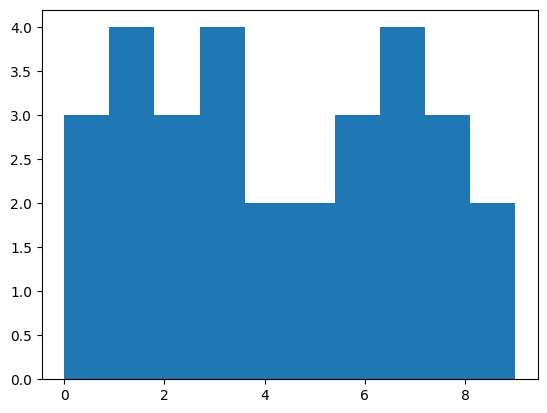

In [119]:
plt.hist(sample)
plt.show()

## Analysera verkliga data

Medelvärde och varians är mycket viktiga när man analyserar data från verkligheten. Låt oss ladda data om basebollspelare från [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Vi använder ett paket som heter [**Pandas**](https://pandas.pydata.org/) här för dataanalys. Vi kommer att prata mer om Pandas och att arbeta med data i Python senare i den här kursen.

Låt oss beräkna medelvärden för ålder, längd och vikt:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Nu låt oss fokusera på höjd och beräkna standardavvikelse och varians:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Förutom medelvärdet är det vettigt att titta på medianvärdet och kvartilerna. De kan visualiseras med hjälp av ett **låddiagram**:


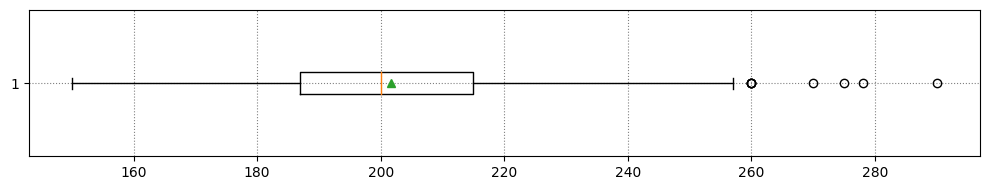

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Vi kan också göra lådagram av delmängder av vår dataset, till exempel grupperade efter spelarens roll.


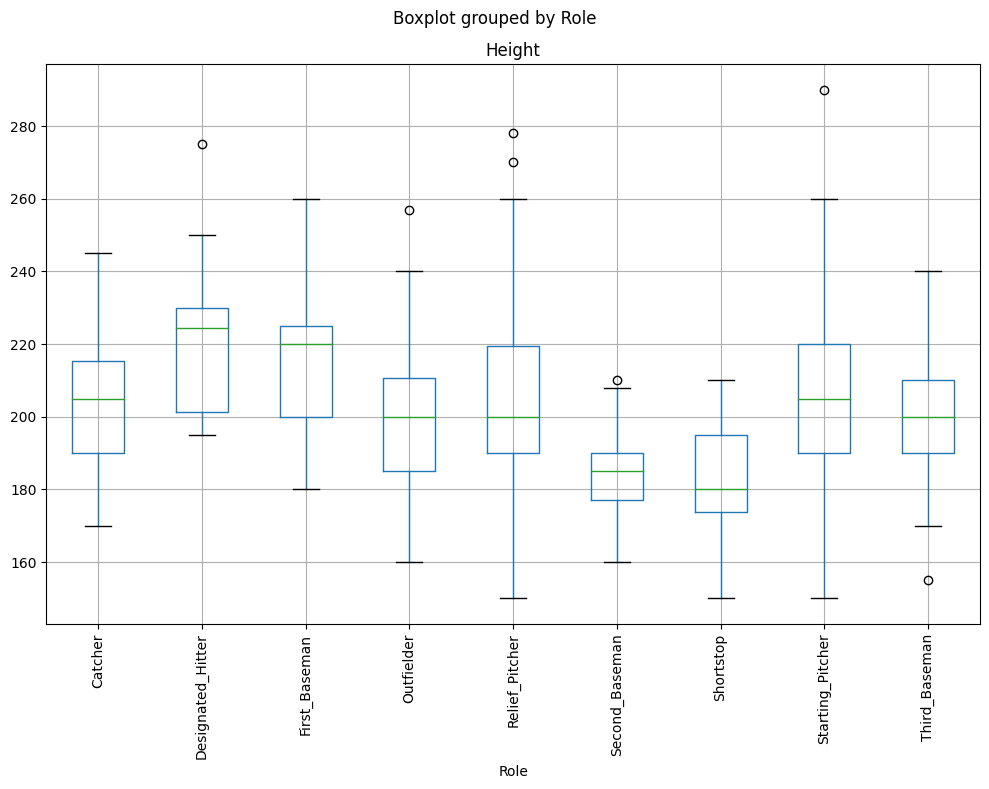

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Observera**: Detta diagram antyder att, i genomsnitt, är förstabasens längder högre än andrabasens längder. Senare kommer vi att lära oss hur vi kan testa denna hypotes mer formellt, och hur vi kan visa att våra data är statistiskt signifikanta för att styrka detta.

Ålder, längd och vikt är alla kontinuerliga slumpmässiga variabler. Vad tror du att deras fördelning är? Ett bra sätt att ta reda på det är att rita ett histogram över värdena:


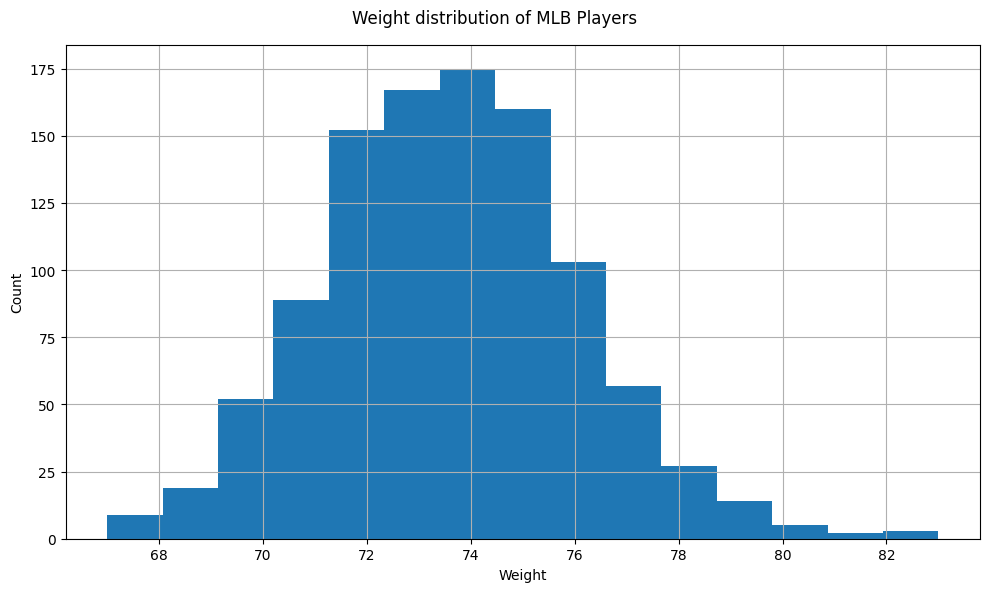

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normalfördelning

Låt oss skapa ett artificiellt urval av vikter som följer en normalfördelning med samma medelvärde och varians som våra verkliga data:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

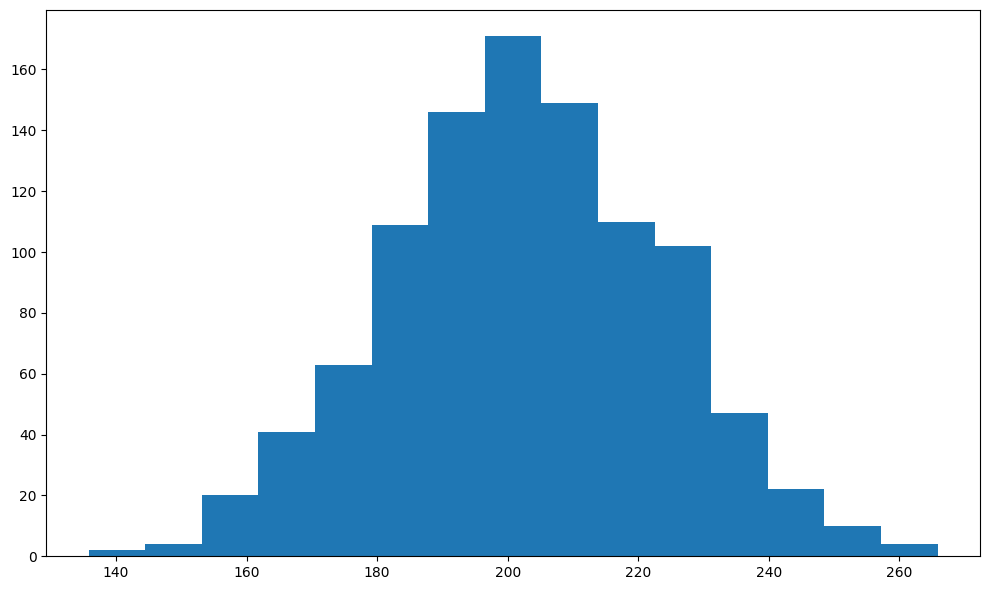

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

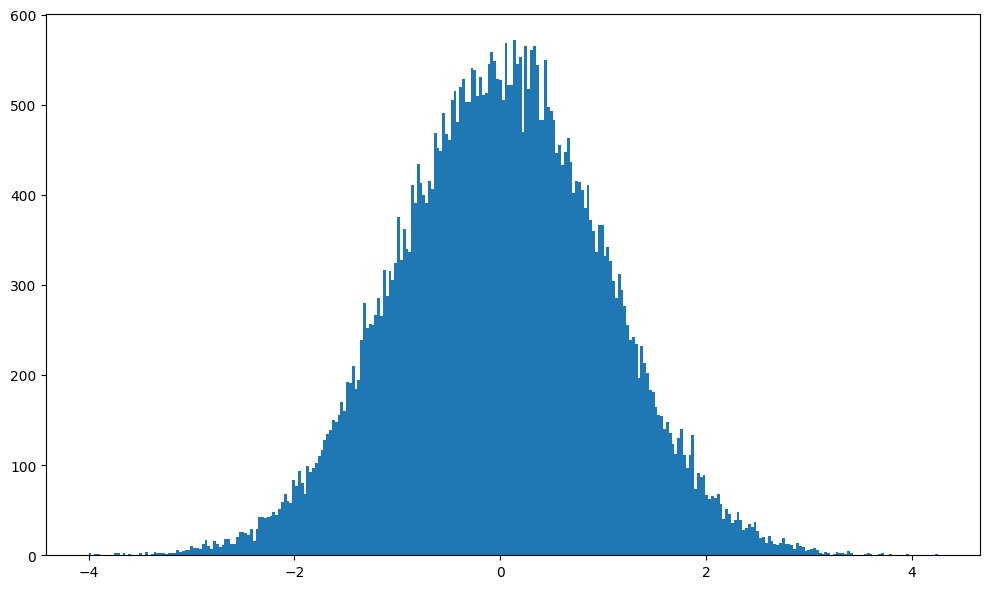

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Eftersom de flesta värden i verkliga livet är normalfördelade bör vi inte använda en uniform slumptalsgenerator för att generera provdata. Här är vad som händer om vi försöker generera vikter med en uniform fördelning (genererad av `np.random.rand`):


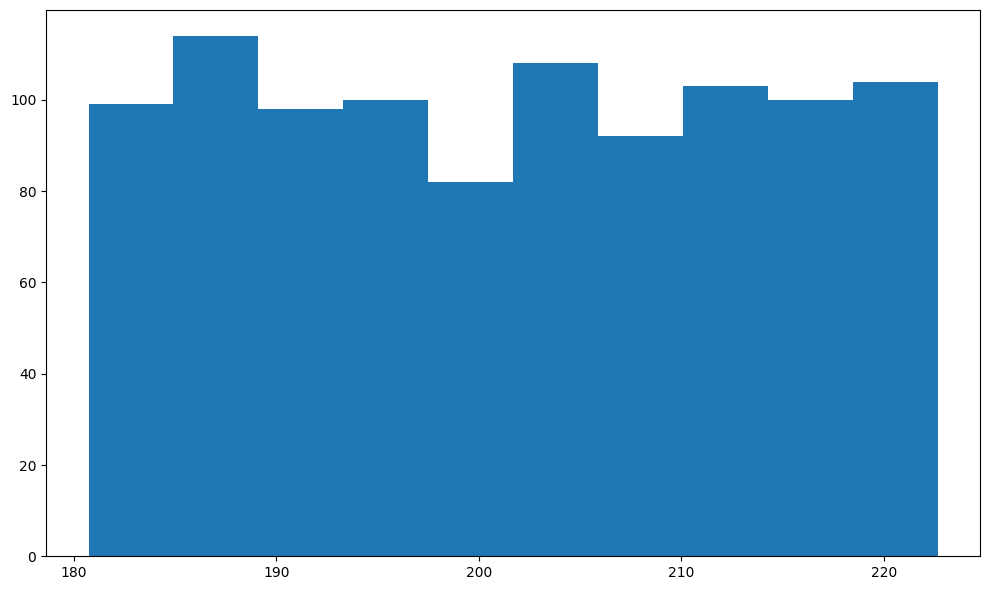

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Konfidensintervall

Låt oss nu beräkna konfidensintervall för vikter och längder hos basebollspelare. Vi kommer att använda koden [från denna stackoverflow-diskussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Hypotesprövning

Låt oss utforska olika roller i vår dataset med basebollspelare:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Vi kan se att intervallen inte överlappar.

Ett statistiskt mer korrekt sätt att bevisa hypotesen är att använda ett **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


De två värdena som returneras av funktionen `ttest_ind` är:  
* p-värdet kan betraktas som sannolikheten för att två fördelningar har samma medelvärde. I vårt fall är det mycket lågt, vilket innebär att det finns starka bevis som stöder att första basmän är längre.  
* t-värdet är det mellanliggande värdet av den normaliserade medelvärdesskillnaden som används i t-testet, och det jämförs med ett tröskelvärde för en given konfidensnivå.  


## Simulera en normalfördelning med centrala gränsvärdessatsen

Den pseudorandom-generator som finns i Python är utformad för att ge oss en jämn fördelning. Om vi vill skapa en generator för normalfördelning kan vi använda den centrala gränsvärdessatsen. För att få ett normalfördelat värde beräknar vi helt enkelt medelvärdet av ett jämnt fördelat urval.


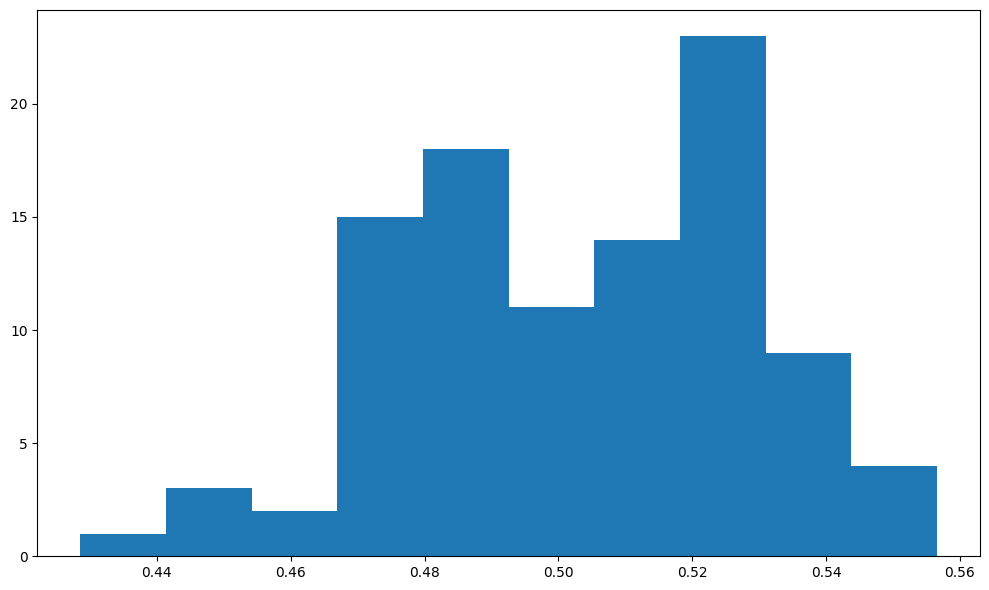

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korrelation och Ondskefulla Baseballbolaget

Korrelation hjälper oss att hitta samband mellan dataserier. I vårt enkla exempel kan vi låtsas att det finns ett ondskefullt baseballbolag som betalar sina spelare baserat på deras längd – ju längre spelaren är, desto mer pengar får han/hon. Anta att det finns en grundlön på $1000 och en extra bonus från $0 till $100, beroende på längd. Vi kommer att använda riktiga spelare från MLB och beräkna deras påhittade löner:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Låt oss nu beräkna kovarians och korrelation för dessa sekvenser. `np.cov` kommer att ge oss en så kallad **kovariansmatris**, vilket är en utvidgning av kovarians till flera variabler. Elementet $M_{ij}$ i kovariansmatrisen $M$ är en korrelation mellan indata variablerna $X_i$ och $X_j$, och diagonalvärdena $M_{ii}$ är variansen för $X_{i}$. På liknande sätt kommer `np.corrcoef` att ge oss **korrelationsmatrisen**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


En korrelation som är lika med 1 innebär att det finns en stark **linjär relation** mellan två variabler. Vi kan visuellt se den linjära relationen genom att plotta ett värde mot det andra:


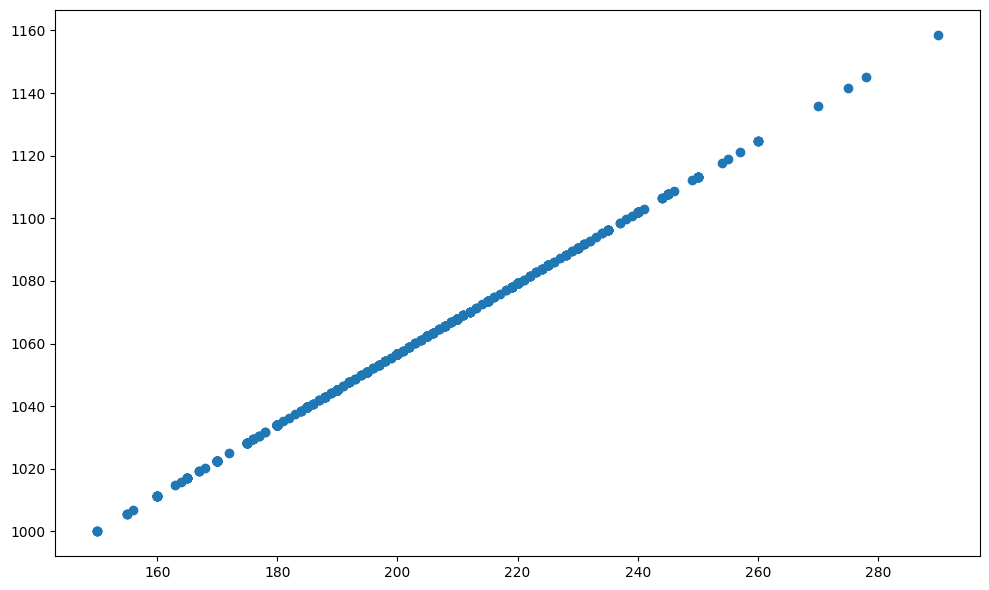

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Låt oss se vad som händer om relationen inte är linjär. Anta att vårt företag bestämde sig för att dölja det uppenbara linjära sambandet mellan höjder och löner, och införde en viss icke-linjärhet i formeln, såsom `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


I det här fallet är korrelationen något mindre, men den är fortfarande ganska hög. Nu, för att göra sambandet ännu mindre uppenbart, kanske vi vill lägga till lite extra slumpmässighet genom att lägga till en slumpmässig variabel till lönen. Låt oss se vad som händer:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


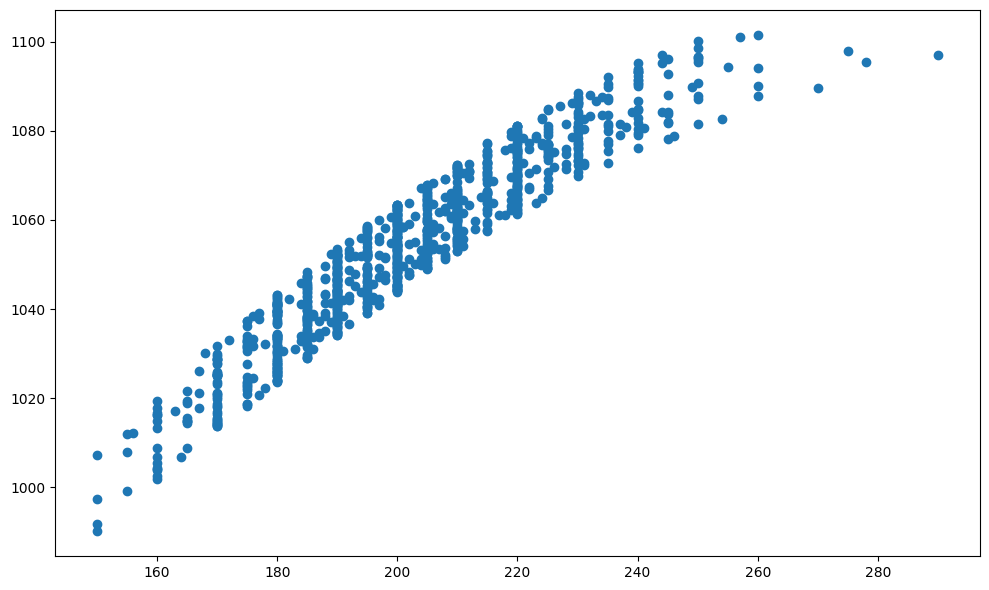

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Kan du gissa varför prickarna radar upp sig i vertikala linjer så här?

Vi har observerat sambandet mellan ett konstgjort koncept som lön och den observerade variabeln *längd*. Låt oss också se om de två observerade variablerna, som längd och vikt, också korrelerar:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Tyvärr fick vi inga resultat - bara några konstiga `nan`-värden. Detta beror på att vissa av värdena i vår serie är odefinierade, representerade som `nan`, vilket gör att resultatet av operationen också blir odefinierat. Genom att titta på matrisen kan vi se att `Weight` är den problematiska kolumnen, eftersom självkorrelationen mellan `Height`-värden har beräknats.

> Detta exempel visar vikten av **databearbetning** och **rengöring**. Utan korrekt data kan vi inte beräkna något.

Låt oss använda metoden `fillna` för att fylla i de saknade värdena och beräkna korrelationen:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Det finns verkligen en korrelation, men inte en så stark som i vårt konstgjorda exempel. Faktum är att om vi tittar på spridningsdiagrammet av ett värde mot det andra, skulle sambandet vara mycket mindre uppenbart:


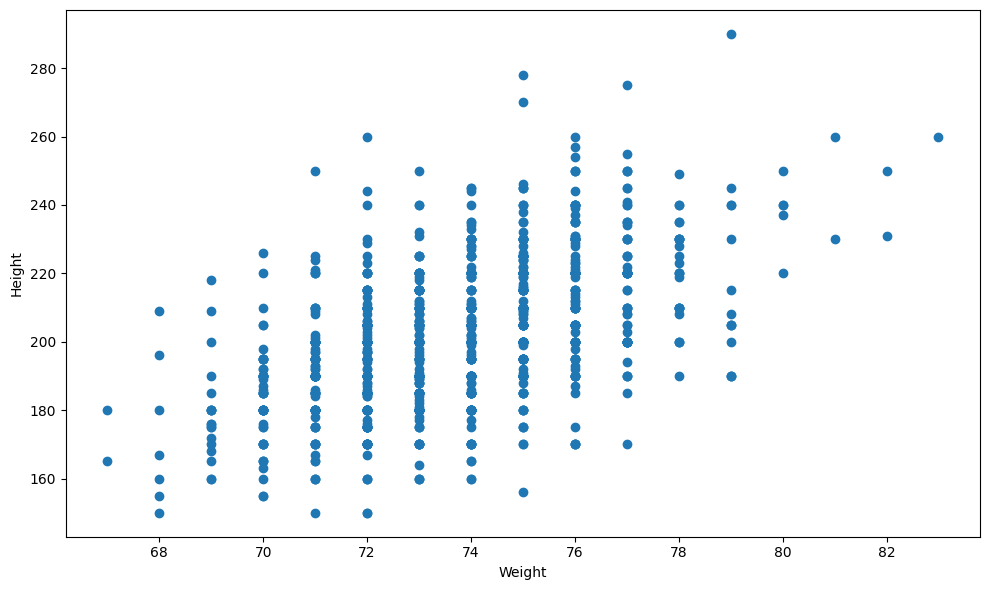

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Slutsats

I den här anteckningsboken har vi lärt oss hur man utför grundläggande operationer på data för att beräkna statistiska funktioner. Vi vet nu hur man använder ett gediget verktyg inom matematik och statistik för att bevisa vissa hypoteser, samt hur man beräknar konfidensintervall för godtyckliga variabler baserat på ett dataprovsample.



---

**Ansvarsfriskrivning**:  
Detta dokument har översatts med hjälp av AI-översättningstjänsten [Co-op Translator](https://github.com/Azure/co-op-translator). Även om vi strävar efter noggrannhet, bör det noteras att automatiserade översättningar kan innehålla fel eller brister. Det ursprungliga dokumentet på dess originalspråk bör betraktas som den auktoritativa källan. För kritisk information rekommenderas professionell mänsklig översättning. Vi ansvarar inte för eventuella missförstånd eller feltolkningar som kan uppstå vid användning av denna översättning.
